In [1]:
# import imp packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

%matplotlib notebook
plt.style.use("seaborn")

In [2]:
df = pd.DataFrame.from_csv("data/cleaned_two.csv", header=0)
df.head()

,Zone,Main_Ingredients,Ingredients,Recipy_Link,Ing_Count,Main_Ing_Count,Nutrition_Value
1,1,"['rice', 'milk']","['Basmati rice ', 'minus ', 'tbsp of rice', 's...",http://www.sailusfood.com/2014/03/20/phirni-re...,38,2,86
2,1,"['flour', 'corn']","['Plain flour ', 'maida', 'all purpose flour',...",http://www.sailusfood.com/2014/07/22/savory-mu...,55,2,364
5,1,"['besan', 'potato']","['Gramflour ', 'tbsps\\r', 'Mustard seeds ', '...",http://www.sailusfood.com/2013/04/23/indian-fo...,46,2,232
6,1,['paneer'],"['Paneer ', 'cubed', 'place in warm water for ...",http://www.sailusfood.com/2013/09/02/paneer-ta...,74,1,50
7,1,"['milk', 'falooda', 'rose', 'syrup']","['Milk ', 'full fat\\r', 'Jelly ', 'cubed ', '...",http://www.sailusfood.com/2015/05/26/falooda-r...,44,3,251


In [3]:
df = df.reset_index()

In [4]:
df.head()

,index,Zone,Main_Ingredients,Ingredients,Recipy_Link,Ing_Count,Main_Ing_Count,Nutrition_Value
0,1,1,"['rice', 'milk']","['Basmati rice ', 'minus ', 'tbsp of rice', 's...",http://www.sailusfood.com/2014/03/20/phirni-re...,38,2,86
1,2,1,"['flour', 'corn']","['Plain flour ', 'maida', 'all purpose flour',...",http://www.sailusfood.com/2014/07/22/savory-mu...,55,2,364
2,5,1,"['besan', 'potato']","['Gramflour ', 'tbsps\\r', 'Mustard seeds ', '...",http://www.sailusfood.com/2013/04/23/indian-fo...,46,2,232
3,6,1,['paneer'],"['Paneer ', 'cubed', 'place in warm water for ...",http://www.sailusfood.com/2013/09/02/paneer-ta...,74,1,50
4,7,1,"['milk', 'falooda', 'rose', 'syrup']","['Milk ', 'full fat\\r', 'Jelly ', 'cubed ', '...",http://www.sailusfood.com/2015/05/26/falooda-r...,44,3,251


In [26]:
df.shape

(455, 8)

<IPython.core.display.Javascript object>


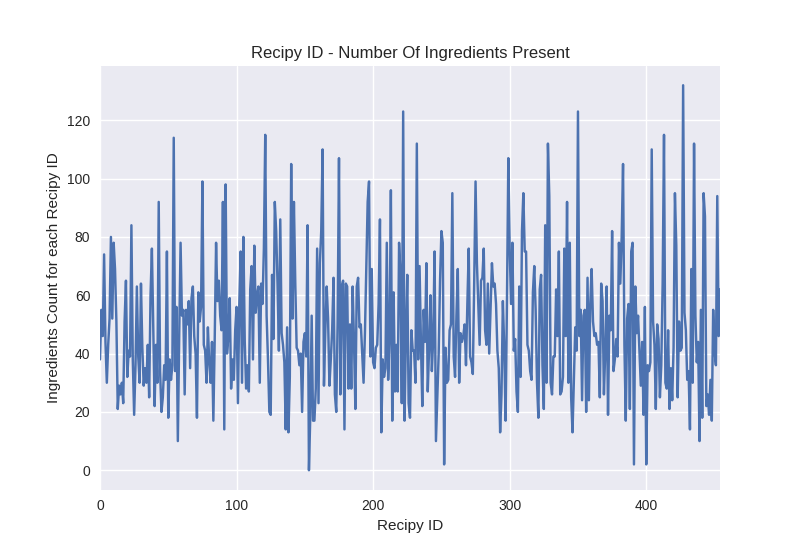

In [25]:
plt.figure()
df["Ing_Count"].plot()
plt.xlabel("Recipy ID")
plt.ylabel("Ingredients Count for each Recipy ID")
plt.title("Recipy ID - Number Of Ingredients Present")
plt.show()

In [6]:
# sort data based on the zone
df1 = df.loc[:, ["Zone", "Main_Ingredients"]]
df1.head()

,Zone,Main_Ingredients
0,1,"['rice', 'milk']"
1,1,"['flour', 'corn']"
2,1,"['besan', 'potato']"
3,1,['paneer']
4,1,"['milk', 'falooda', 'rose', 'syrup']"


In [7]:
east_dict = dict()
west_dict = dict()
north_dict = dict()
south_dict = dict()

for i, row in df1.iterrows():
    zone = row[0]
    ing_string = row[1]
    ing_list = re.findall("\w+", ing_string)
    # print(ing_list)
    if row[0] == 1:
        for x in ing_list:
            if x in east_dict:
                east_dict[x] += 1
            else:
                east_dict[x] = 1
    elif row[0] == 2:
        for x in ing_list:
            if x in west_dict:
                west_dict[x] += 1
            else:
                west_dict[x] = 1
    elif row[0] == 3:
        for x in ing_list:
            if x in north_dict:
                north_dict[x] += 1
            else:
                north_dict[x] = 1
    elif row[0] == 4:
        for x in ing_list:
            if x in south_dict:
                south_dict[x] += 1
            else:
                south_dict[x] = 1

In [8]:
print(east_dict)

{'rice': 20, 'milk': 14, 'flour': 19, 'corn': 4, 'besan': 2, 'potato': 7, 'paneer': 2, 'falooda': 2, 'rose': 2, 'syrup': 1, 'chenna': 1, 'mango': 12, 'puree': 1, 'sago': 2, 'aloo': 1, 'potatoes': 2, 'mushrooms': 4, 'lettuce': 1, 'oats': 4, 'mixed': 3, 'vegetables': 4, 'sevai': 1, 'coconut': 4, 'full': 2, 'sugar': 8, 'bread': 2, 'curd': 2, 'pulp': 1, 'condensed': 1, 'tomato': 6, 'strawberries': 2, 'carrot': 3, 'spring': 1, 'onions': 3, 'cocoa': 3, 'powder': 4, 'moong': 2, 'fenugreek': 1, 'seeds': 1, 'bhindi': 1, 'dried': 2, 'sandage': 1, 'yellow': 1, 'prawns': 1, 'china': 1, 'grass': 1, 'saffron': 1, 'peanuts': 2, 'spinach': 3, 'black': 2, 'eyed': 1, 'peas': 5, 'fish': 1, 'green': 3, 'fresh': 2, 'fruits': 3, 'agar': 2, 'ghee': 3, 'vanilla': 1, 'essence': 1, 'chickpea': 1, 'chana': 3, 'jaggery': 6, 'chocolate': 5, 'cream': 6, 'almonds': 1, 'beaten': 4, 'tamarind': 5, 'cake': 1, 'bell': 1, 'pepper': 1, 'chickpeas': 1, 'urad': 4, 'maida': 2, 'garlic': 1, 'chilies': 1, 'yogurt': 3, 'nutella

In [9]:
print(south_dict)

{'urad': 4, 'yogurt': 7, 'moong': 8, 'jaggery': 6, 'vermicelli': 1, 'curd': 3, 'curry': 2, 'leaves': 6, 'rice': 21, 'coconut': 6, 'cauliflower': 1, 'semolina': 1, 'milk': 6, 'tamarind': 7, 'cucumber': 2, 'flour': 14, 'sevai': 2, 'potato': 5, 'mango': 12, 'besan': 3, 'tomato': 5, 'ripe': 4, 'spinach': 2, 'bell': 1, 'pepper': 2, 'ragi': 2, 'chicken': 3, 'ghee': 4, 'chana': 3, 'oats': 2, 'bottle': 1, 'gourd': 2, 'cooked': 1, 'rajma': 1, 'boondi': 1, 'dabbakaya': 1, 'ginger': 1, 'sesame': 1, 'seeds': 3, 'sago': 2, 'paneer': 4, 'mixed': 1, 'vegetables': 1, 'puffed': 2, 'capsicum': 1, 'idli': 1, 'rava': 1, 'aloo': 1, 'potatoes': 1, 'Black': 1, 'gram': 2, 'Yogurt': 1, 'beaten': 1, 'cornflakes': 1, 'chickpea': 2, 'peanuts': 2, 'mushroom': 1, 'cracked': 1, 'wheat': 3, 'bread': 1, 'sugar': 6, 'Milk': 2, 'Powder': 1, 'Condensed': 1, 'chocolate': 2, 'cream': 5, 'blueberries': 1, 'cheese': 3, 'fennel': 1, 'rock': 1, 'tomatoes': 1, 'butter': 1, 'broken': 1, 'sweet': 2, 'chenna': 1, 'puree': 2, 'blue

In [10]:
print(north_dict)

{'banana': 1, 'wheat': 4, 'flour': 6, 'urad': 3, 'potatoes': 2, 'green': 3, 'peas': 4, 'tomatoes': 1, 'potato': 4, 'brinjal': 1, 'kidney': 1, 'beans': 1, 'tomato': 4, 'gobi': 1, 'maida': 1, 'sugar': 3, 'besan': 2, 'ghee': 1, 'mango': 9, 'basmati': 1, 'rice': 6, 'whole': 2, 'spices': 1, 'bhindi': 2, 'almonds': 1, 'milk': 4, 'curd': 1, 'boondi': 1, 'ripe': 2, 'yogurt': 5, 'cucumber': 1, 'falooda': 1, 'noodles': 2, 'kasuri': 1, 'methi': 1, 'coconut': 2, 'rajma': 1, 'Black': 1, 'gram': 1, 'Yogurt': 1, 'mincemeat': 1, 'cracked': 1, 'jaggery': 1, 'bulgur': 1, 'parsley': 1, 'cardamom': 1, 'rooh': 1, 'afza': 1, 'lemon': 1, 'juice': 1, 'mushroom': 1, 'khoya': 1, 'paneer': 1, 'mint': 1, 'leaves': 2, 'black': 2, 'salt': 1, 'blueberries': 1, 'cream': 2, 'cheese': 2, 'garlic': 1, 'chilies': 1, 'tender': 1, 'tamarind': 1, 'lasagna': 1, 'ricotta': 1, 'cabbage': 1, 'sesame': 1, 'seeds': 2, 'chicken': 2, 'full': 1, 'mushrooms': 1, 'spring': 1, 'onions': 1, 'brinjals': 1, 'chenna': 1, 'puree': 1, 'peppe

In [11]:
print(west_dict)

{'flour': 24, 'butter': 4, 'eggs': 4, 'dried': 1, 'fruits': 5, 'nuts': 1, 'rice': 10, 'amaranth': 1, 'leaves': 4, 'fish': 2, 'yogurt': 6, 'mushrooms': 2, 'spring': 1, 'onions': 2, 'yellow': 1, 'cucumber': 2, 'moong': 6, 'sugar': 8, 'urad': 4, 'spinach': 2, 'whole': 3, 'wheat': 5, 'idli': 1, 'rava': 1, 'black': 5, 'lentils': 1, 'chana': 1, 'tomatoes': 2, 'sattu': 2, 'chicken': 3, 'tamarind': 2, 'milk': 10, 'brinjal': 2, 'mawa': 1, 'tomato': 7, 'strawberries': 2, 'china': 1, 'grass': 1, 'mango': 19, 'chili': 1, 'powder': 4, 'mustard': 1, 'maida': 2, 'mushroom': 1, 'green': 3, 'peas': 4, 'peppercorns': 1, 'pineapple': 1, 'coconut': 4, 'rajma': 1, 'bhindi': 2, 'carrots': 1, 'beans': 2, 'curd': 1, 'ridge': 2, 'gourd': 3, 'beetroot': 1, 'gram': 3, 'chilis': 1, 'biscuits': 1, 'chocolate': 2, 'jaggery': 4, 'bread': 2, 'full': 1, 'sweet': 3, 'corn': 3, 'ghee': 2, 'cabbage': 1, 'potato': 5, 'cauliflower': 1, 'banana': 1, 'carrot': 1, 'bengal': 2, 'cinnamon': 1, 'oats': 2, 'plantain': 1, 'ragi': 

In [12]:
main_list = [east_dict, west_dict, north_dict, south_dict]

<IPython.core.display.Javascript object>


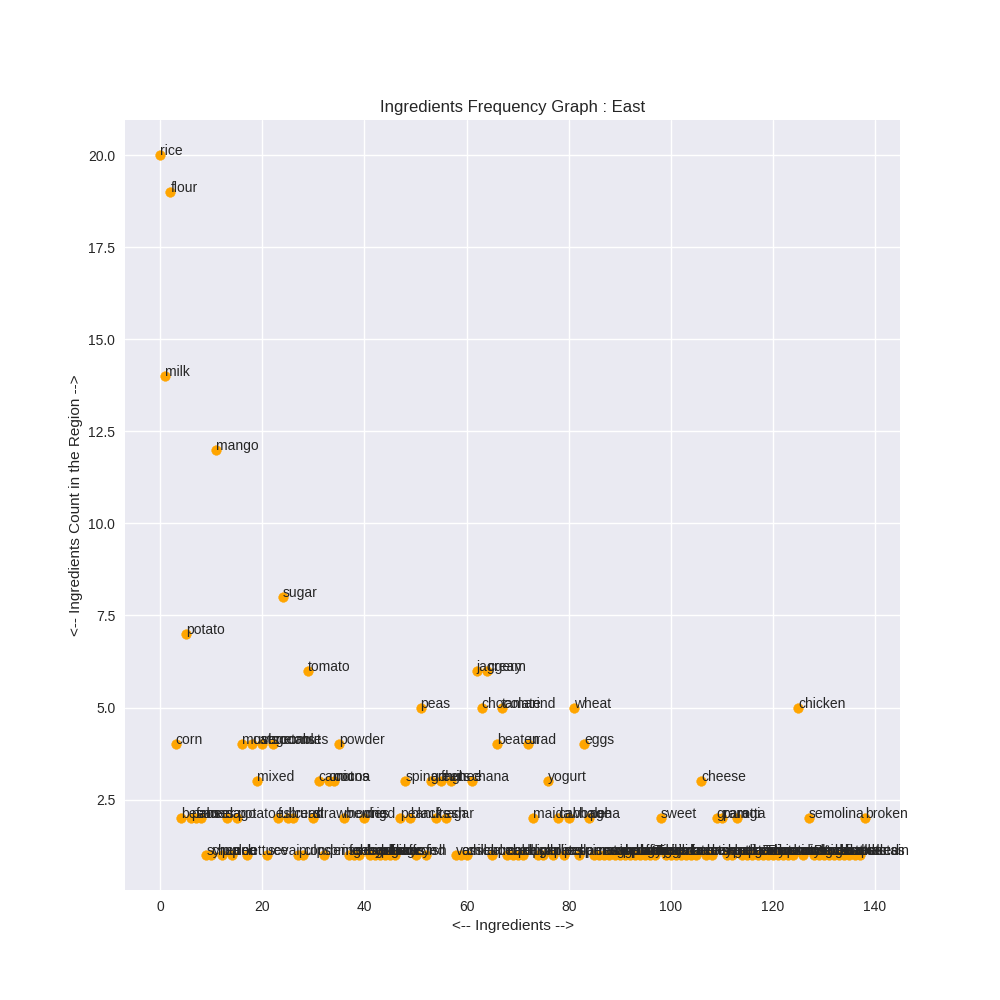

<IPython.core.display.Javascript object>


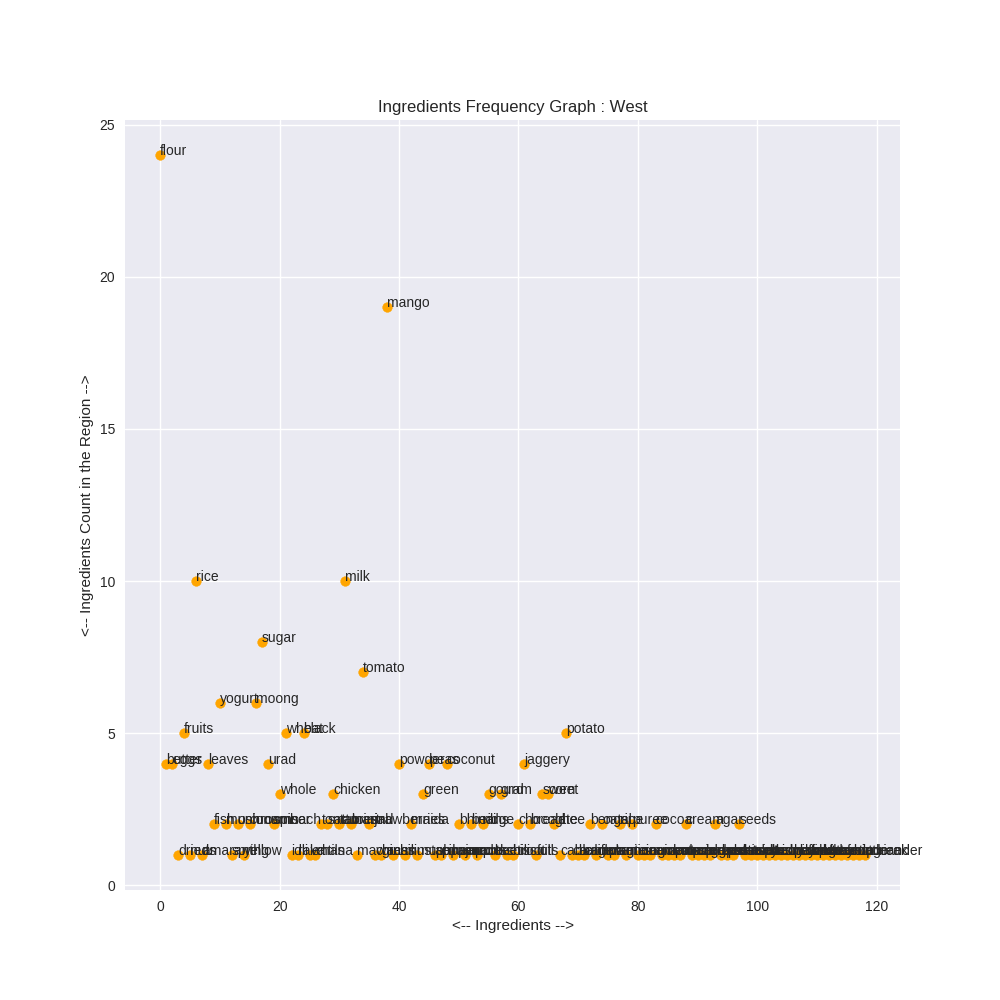

<IPython.core.display.Javascript object>


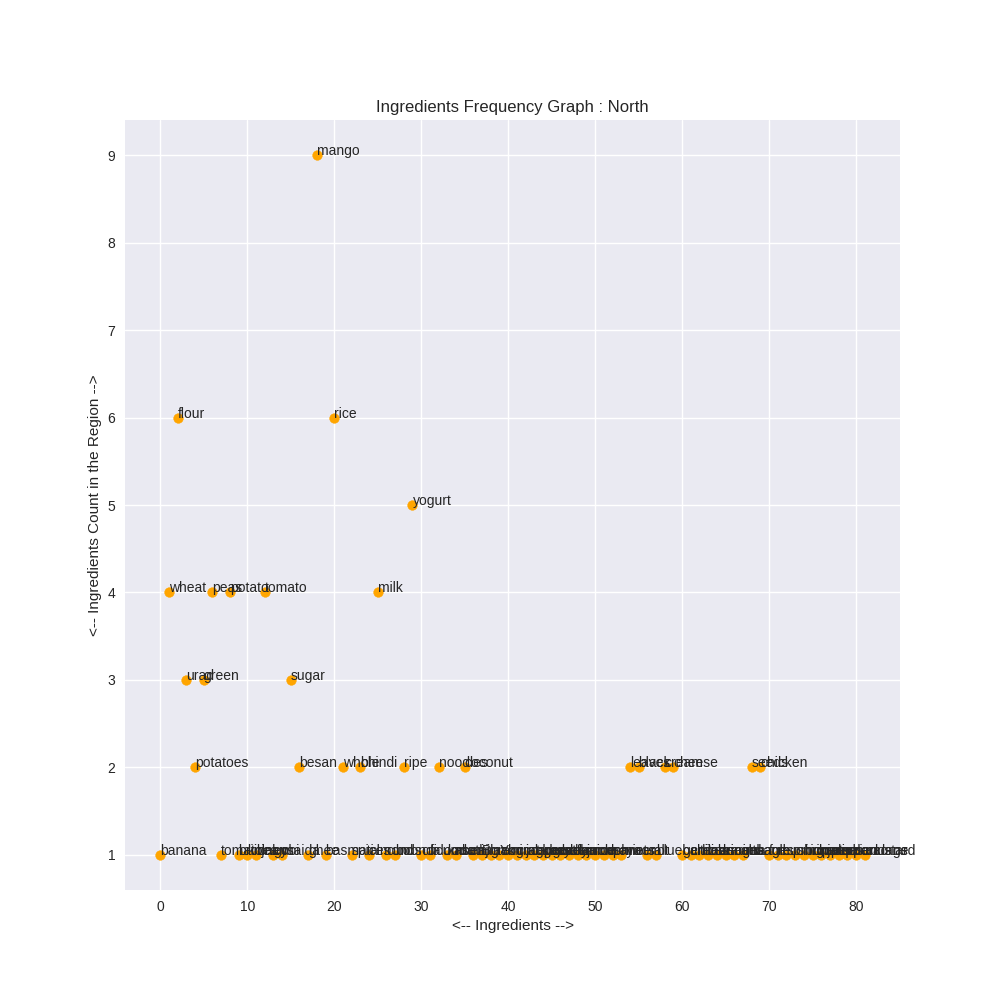

<IPython.core.display.Javascript object>


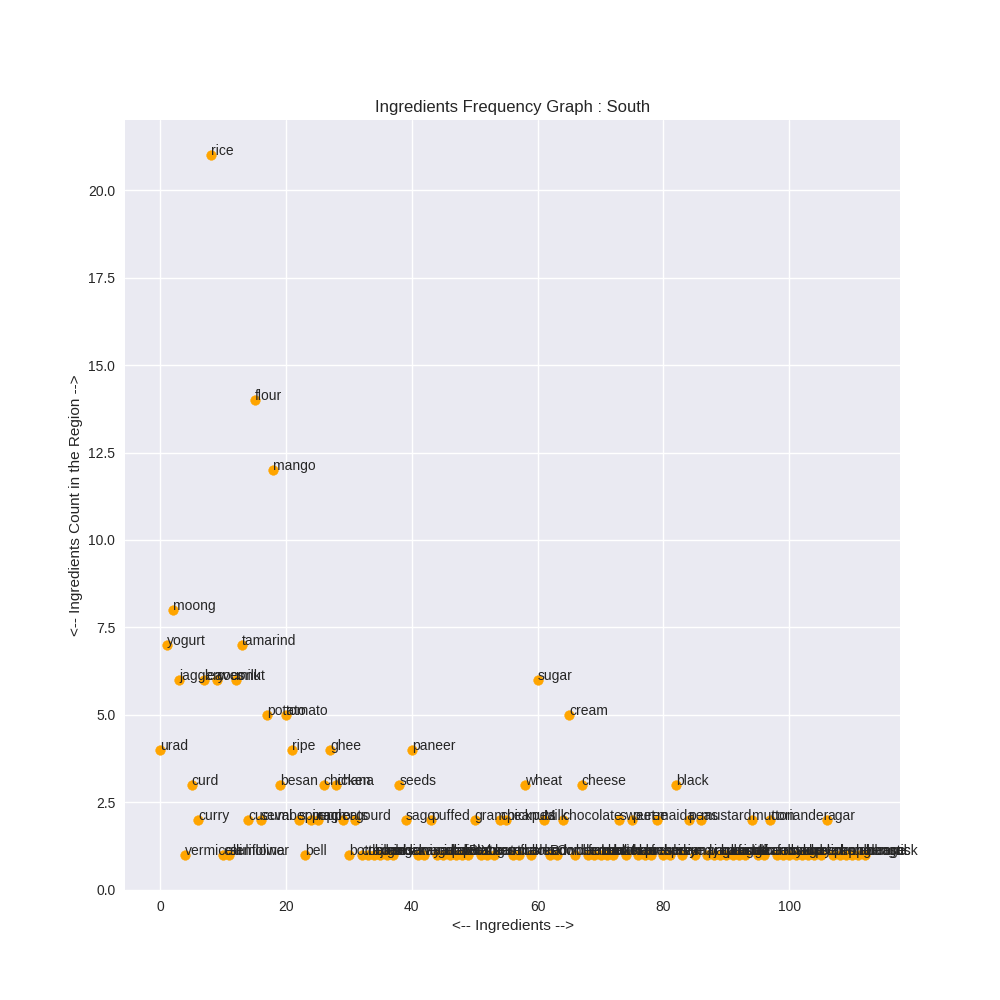

In [13]:
name = ["East", "West", "North", "South"]
ni = 0
for x in main_list:
    n = range(len(x.keys()))
    X = list(x.keys())
    Y = list(x.values())
    plt.figure(figsize=(10, 10))
    plt.scatter(n, Y, color="orange")
    for i, txt in enumerate(X):
        plt.annotate(txt, (n[i], Y[i]))
    plt.xlabel("<-- Ingredients -->")
    plt.ylabel("<-- Ingredients Count in the Region -->")
    plt.title("Ingredients Frequency Graph : " + name[ni])
    plt.show()
    ni += 1

<IPython.core.display.Javascript object>


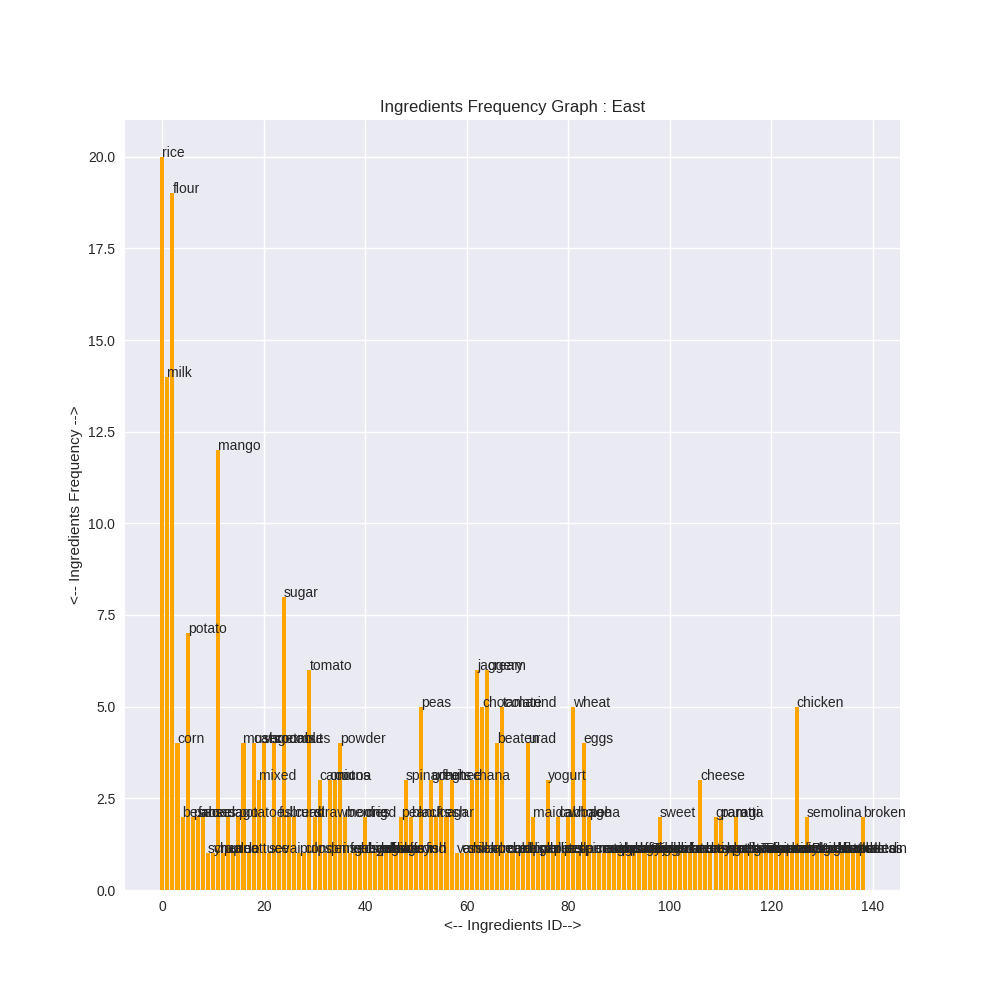

<IPython.core.display.Javascript object>


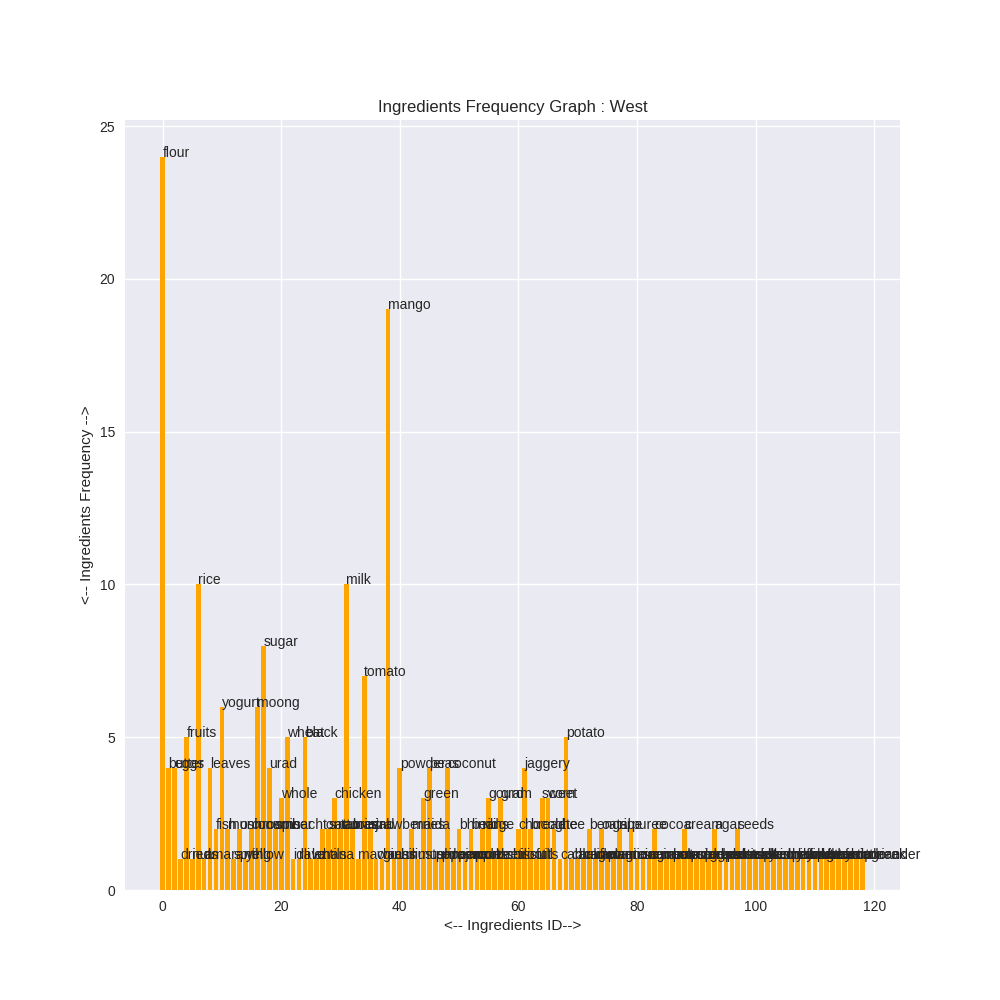

<IPython.core.display.Javascript object>


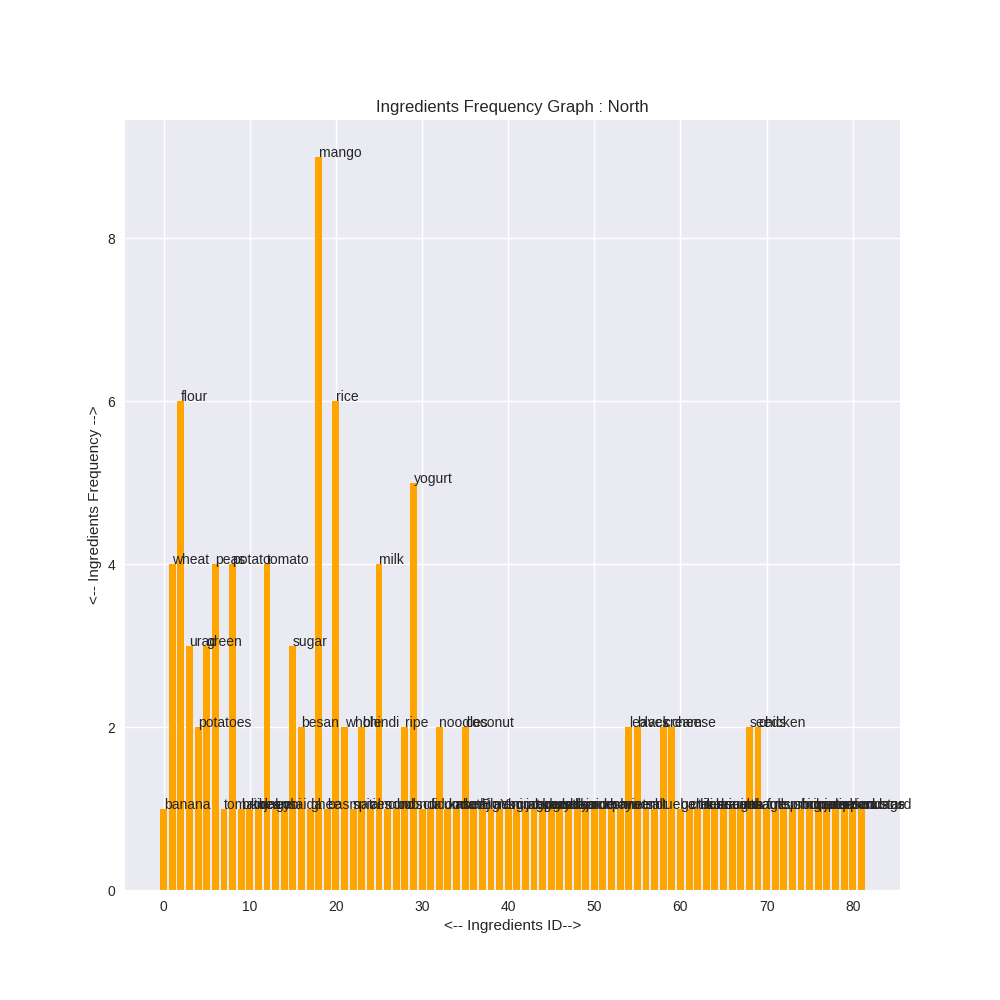

<IPython.core.display.Javascript object>


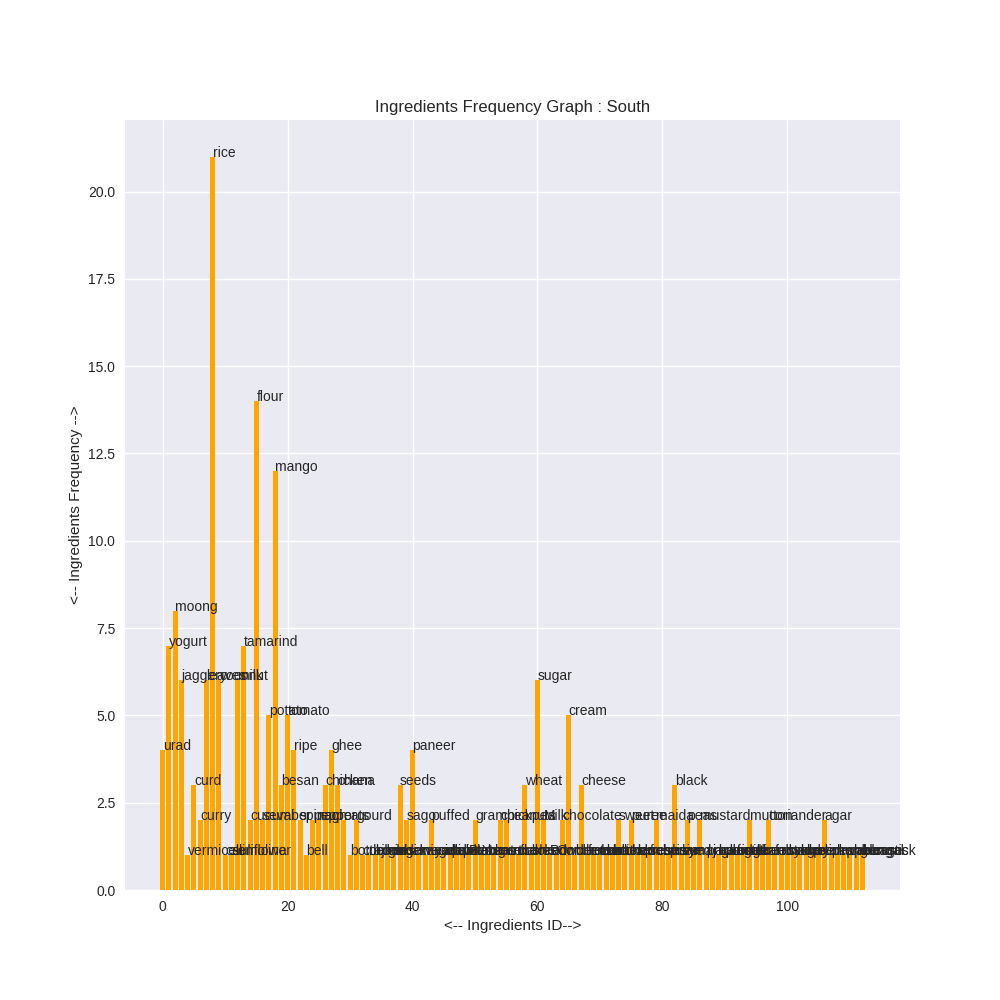

In [14]:
name = ["East", "West", "North", "South"]
ni = 0
for x in main_list:
    n = range(len(x.keys()))
    X = list(x.keys())
    Y = list(x.values())
    plt.figure(figsize=(10, 10))
    plt.bar(n, Y, color="orange")
    for i, txt in enumerate(X):
        plt.annotate(txt, (n[i], Y[i]))
    plt.xlabel("<-- Ingredients ID-->")
    plt.ylabel("<-- Ingredients Frequency -->")
    plt.title("Ingredients Frequency Graph : " + name[ni])
    plt.show()
    ni += 1

In [15]:
df.head()

,index,Zone,Main_Ingredients,Ingredients,Recipy_Link,Ing_Count,Main_Ing_Count,Nutrition_Value
0,1,1,"['rice', 'milk']","['Basmati rice ', 'minus ', 'tbsp of rice', 's...",http://www.sailusfood.com/2014/03/20/phirni-re...,38,2,86
1,2,1,"['flour', 'corn']","['Plain flour ', 'maida', 'all purpose flour',...",http://www.sailusfood.com/2014/07/22/savory-mu...,55,2,364
2,5,1,"['besan', 'potato']","['Gramflour ', 'tbsps\\r', 'Mustard seeds ', '...",http://www.sailusfood.com/2013/04/23/indian-fo...,46,2,232
3,6,1,['paneer'],"['Paneer ', 'cubed', 'place in warm water for ...",http://www.sailusfood.com/2013/09/02/paneer-ta...,74,1,50
4,7,1,"['milk', 'falooda', 'rose', 'syrup']","['Milk ', 'full fat\\r', 'Jelly ', 'cubed ', '...",http://www.sailusfood.com/2015/05/26/falooda-r...,44,3,251


<IPython.core.display.Javascript object>


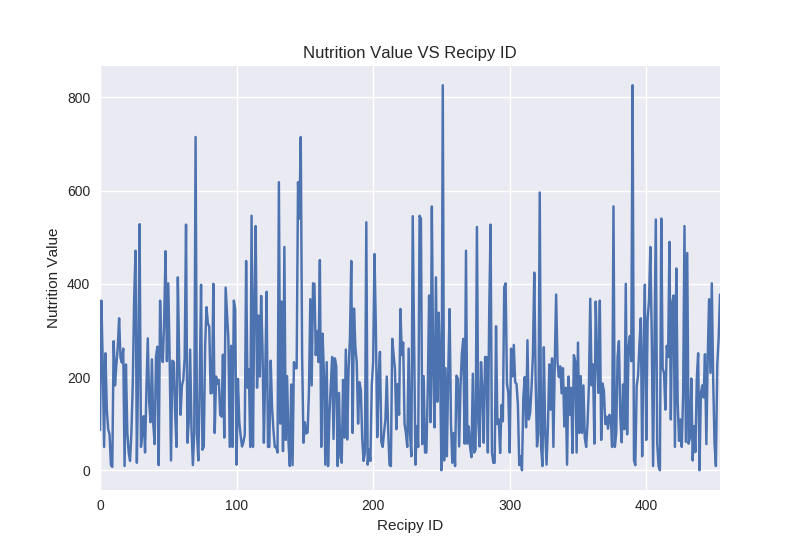

In [27]:
plt.figure()
df["Nutrition_Value"].plot(kind="line")
plt.xlabel("Recipy ID")
plt.ylabel("Nutrition Value")
plt.title("Nutrition Value VS Recipy ID")
plt.show()

In [17]:
new_df = df.loc[:, ["Zone", "Nutrition_Value"]].copy()
new_df.head()

,Zone,Nutrition_Value
0,1,86
1,1,364
2,1,232
3,1,50
4,1,251


In [18]:
east_df = new_df.loc[df["Zone"] == 1]
west_df = new_df.loc[df["Zone"] == 2]
north_df = new_df.loc[df["Zone"] == 3]
south_df = new_df.loc[df["Zone"] == 4]

In [19]:
east_df.head()

,Zone,Nutrition_Value
0,1,86
1,1,364
2,1,232
3,1,50
4,1,251


In [20]:
west_df.head()

,Zone,Nutrition_Value
145,2,618
146,2,540
147,2,715
148,2,247
149,2,59


In [21]:
north_df.head()

,Zone,Nutrition_Value
275,3,44
276,3,522
277,3,104
278,3,51
279,3,232


In [22]:
south_df.head()

,Zone,Nutrition_Value
336,4,200
337,4,223
338,4,165
339,4,219
340,4,94


<IPython.core.display.Javascript object>


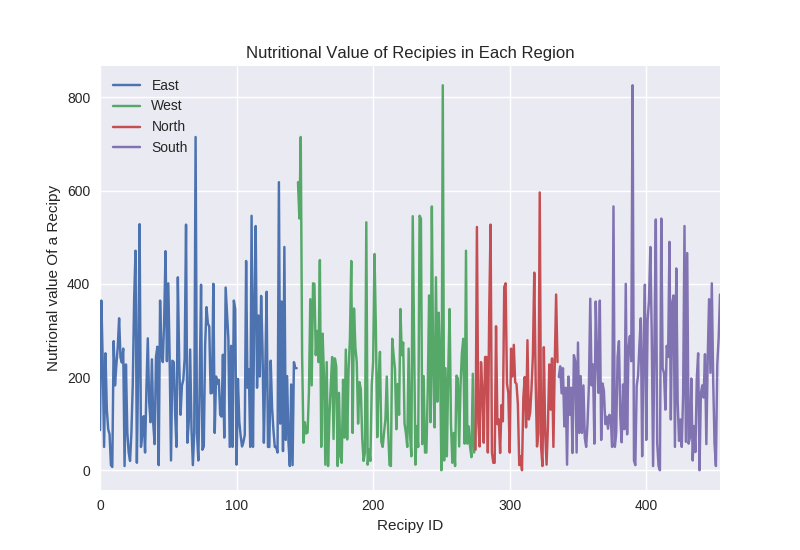

In [23]:
plt.figure()
east_df["Nutrition_Value"].plot()
west_df["Nutrition_Value"].plot()
north_df["Nutrition_Value"].plot()
south_df["Nutrition_Value"].plot()
plt.legend(["East", "West", "North", "South"])
plt.ylabel("Nutrional value Of a Recipy")
plt.xlabel("Recipy ID")
plt.title("Nutritional Value of Recipies in Each Region")
plt.show()